In [1]:
%pylab inline
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [7]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [3]:
import yt
from yt.units import second, g, cm ,dyne
G = 6.674e-8*cm**3/second**2/g
ctr = 5e18*cm

In [ ]:
vim source/Simulation/SimulationMain/MHDSinkSphere/Simulation_init.F90

In [11]:
def plot_var(i,physical_quantity,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("mhd_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    slc.show()


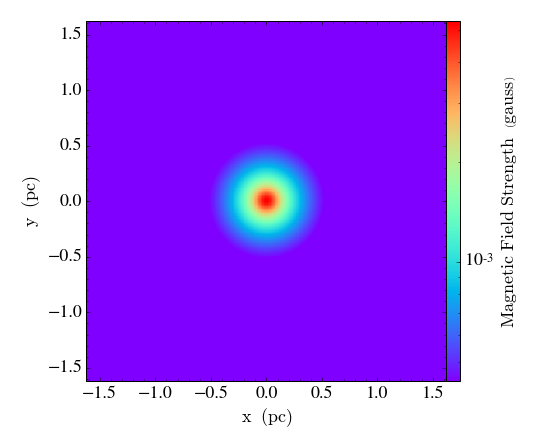


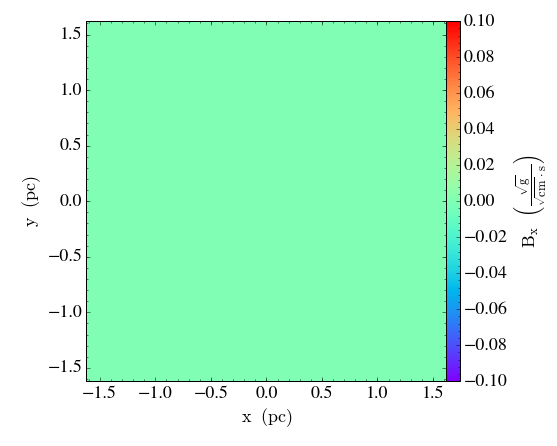


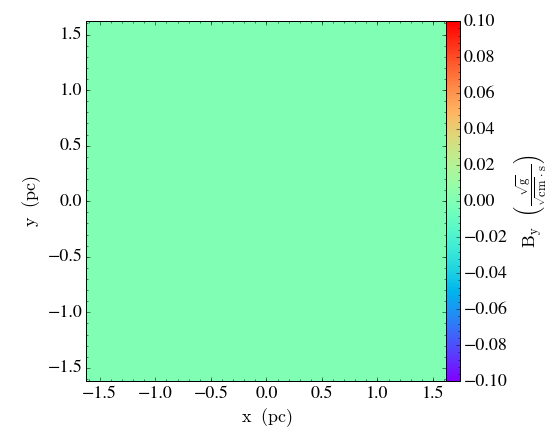


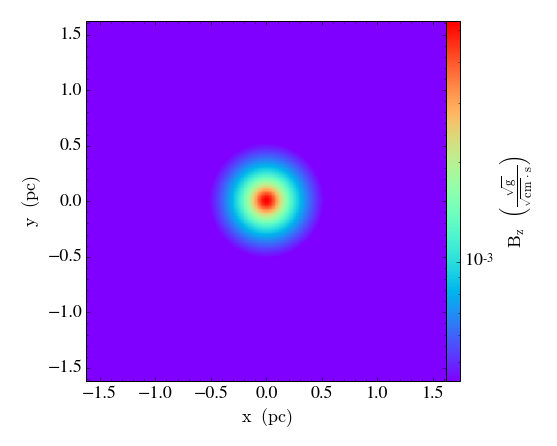

In [15]:
plot_var(0,'magnetic_field_strength')
plot_var(0,'magnetic_field_x')
plot_var(0,'magnetic_field_y')
plot_var(0,'magnetic_field_z')

In [27]:
def plot_dens(i,plane="z", velocity=False,grid=False,zmin ="",zmax="",magnetic=False, particle=False):
    ds = yt.load("mhd_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, plane,physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity(normalize=True)
    if magnetic: slc.annotate_magnetic_field()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    if particle : 
        os.system("cp ../source/Simulation/SimulationMain/unitTest/SinkMomTest/utils/clean_sinks_evol.py .")
        os.system("python clean_sinks_evol.py")
        data =np.loadtxt("sinks_evol.dat_cleaned",skiprows=1)
        pcl_indx_at_t = np.where(np.isclose(int(ds.current_time.in_cgs()),data[:,1]))[0]
        print "Number of sink particles: " , len(pcl_indx_at_t)
        pcl_pos_at_t = data[pcl_indx_at_t,2:5]
        for pos in pcl_pos_at_t:
            slc.annotate_marker(pos, coord_system='data',marker='.',plot_args={'color':'black','s':3})
    slc.show()



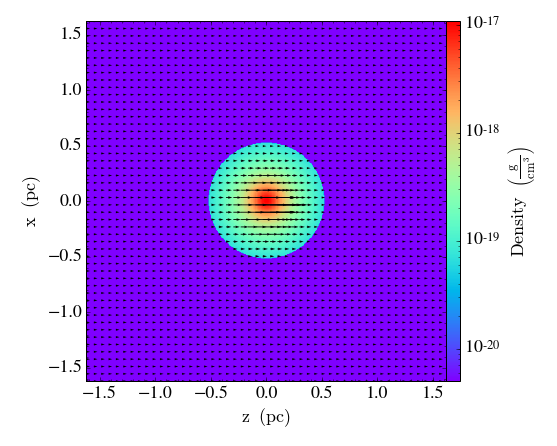


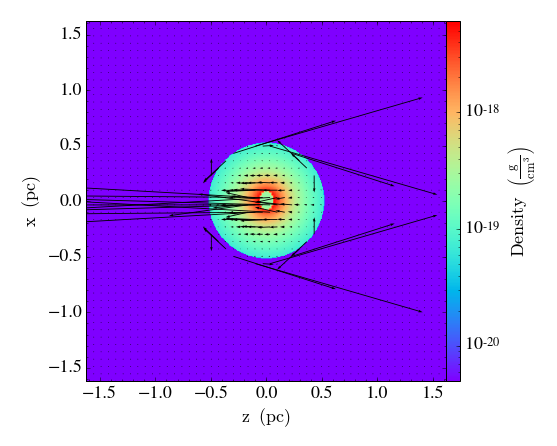


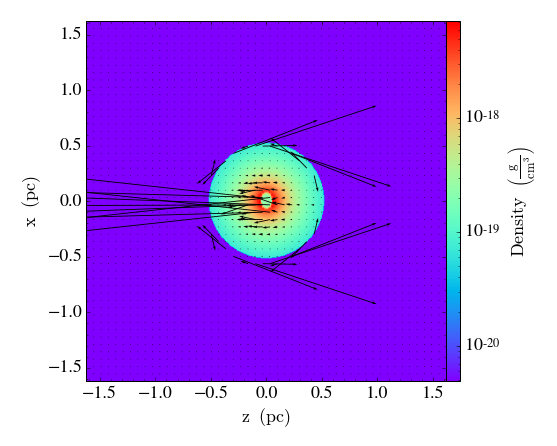


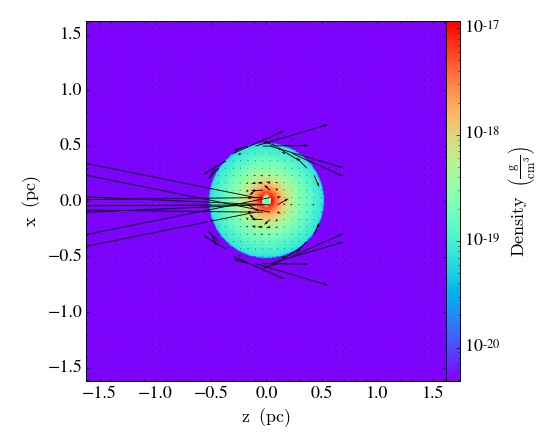


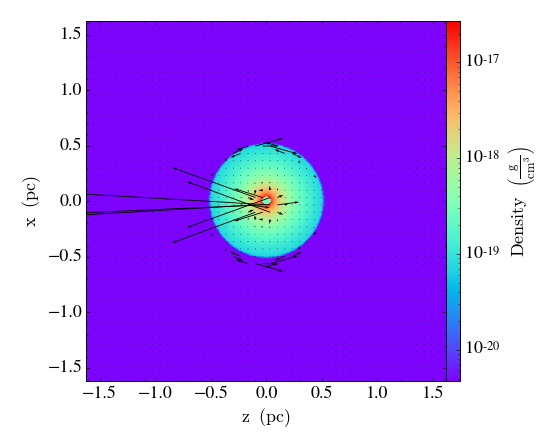


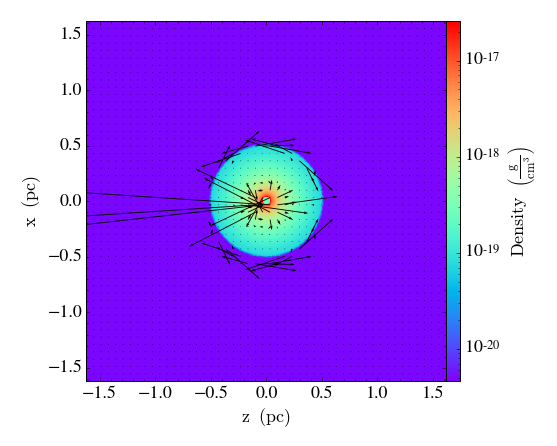

In [28]:
END_TIME = 113
for t in np.arange(END_TIME):
    if t%20 ==0:
        plot_dens(t,'y',magnetic=True)


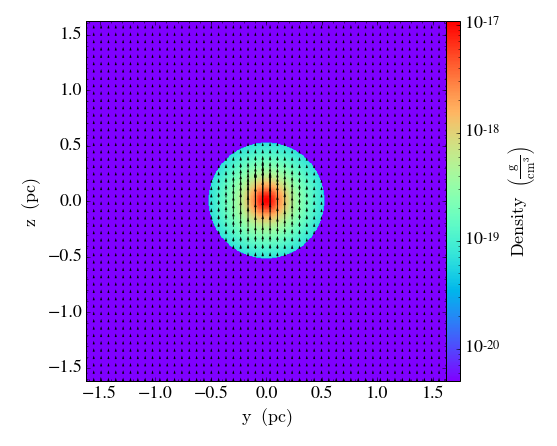


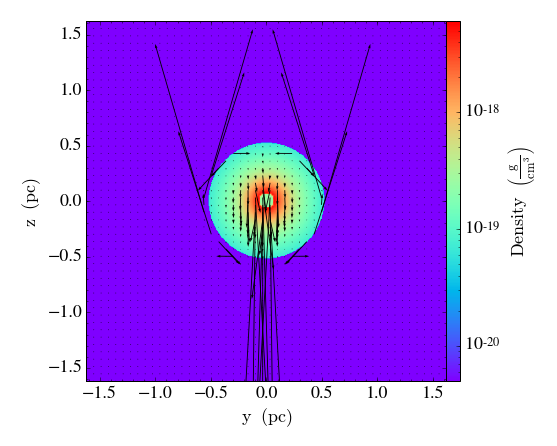


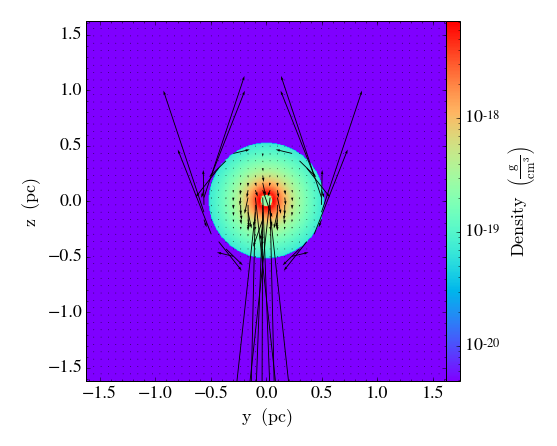


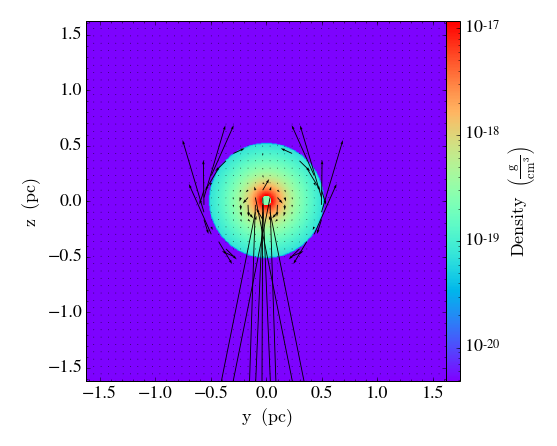


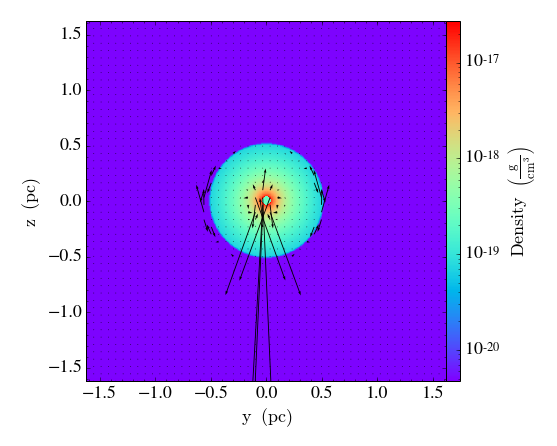


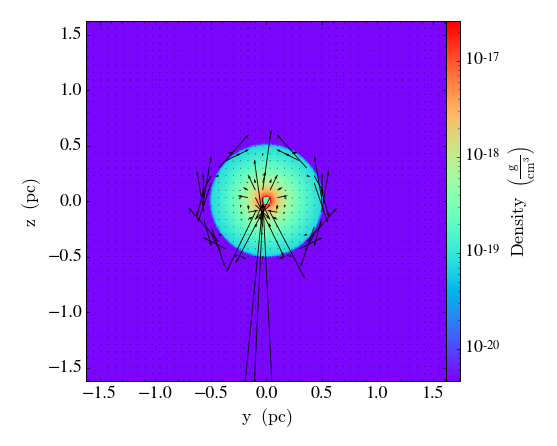

In [29]:
END_TIME = 113
for t in np.arange(END_TIME):
    if t%20 ==0:
        plot_dens(t,'x',magnetic=True)

In [16]:
# ds.derived_field_list

In [10]:
i = 0
ds = yt.load("mhd_sphere_hdf5_chk_{}".format(str(i).zfill(4)))

# Try Without Sinks 


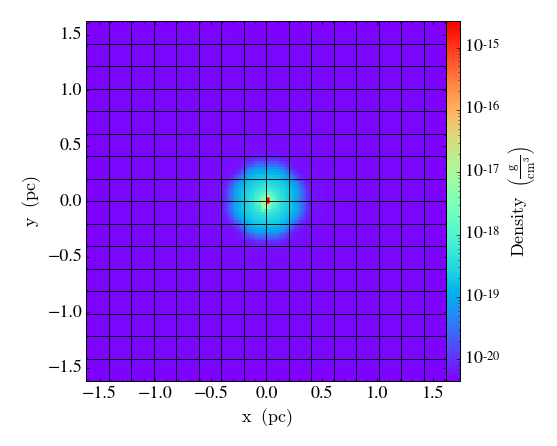

In [44]:
plot_dens(311,grid=True)

In [49]:
def compute_current_time(timestep):
    ds = yt.load("mhd_sphere_hdf5_chk_{}".format(str(timestep).zfill(4)))
    return  ds.current_time

In [50]:
compute_current_time(311)

3.11873715506e+12 code_time

In [51]:
cd ../0beta_no_sink/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/0beta_no_sink


In [54]:
ds = yt.load("sod_hdf5_chk_{}".format(str(56).zfill(4)))
print ds.current_time

1.11355443e+12 code_time


I did the MHD run, one with sink and one without sink. The field lines seems to be curving in, but it's kind of a mess so I can't really tell whether its actually the hourglass shape or not. Rieman non-convergence doesn't happen when the sphere turns into a point, instead the whole box just becomes uniform density towards the end. Even without the sinks, the lifetime of the sphere is about three times  than the non-MHD case, so that makes sense because the outward magnetic force supports the sphere from collapsing.

#### Timestep 311 is the last timestep, everything after this is just a uniform box 


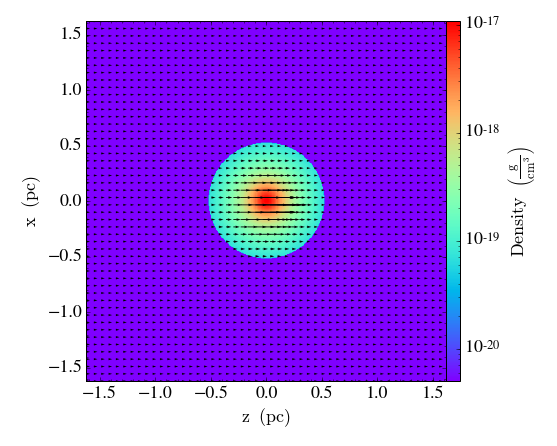


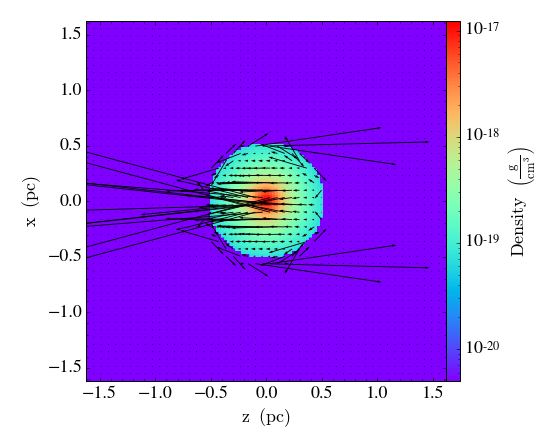


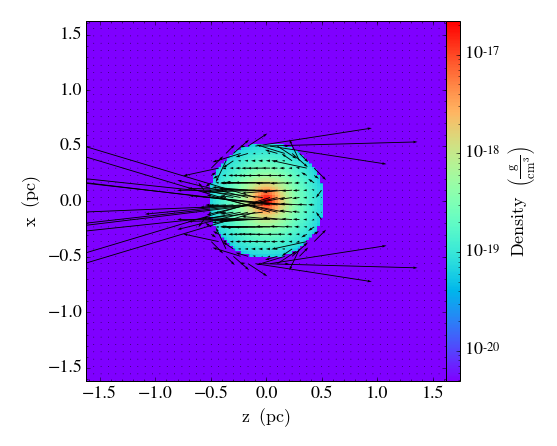


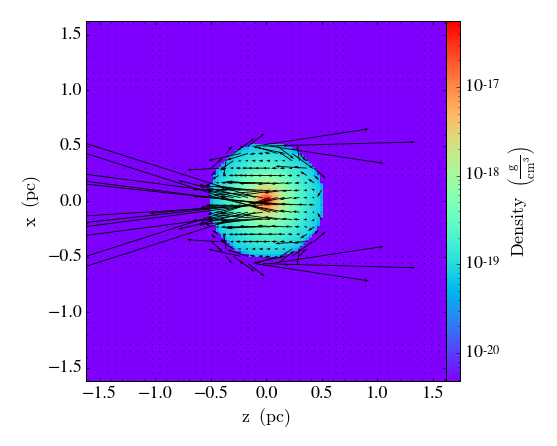


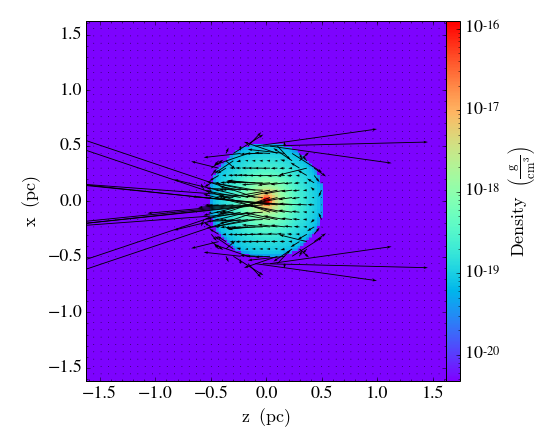


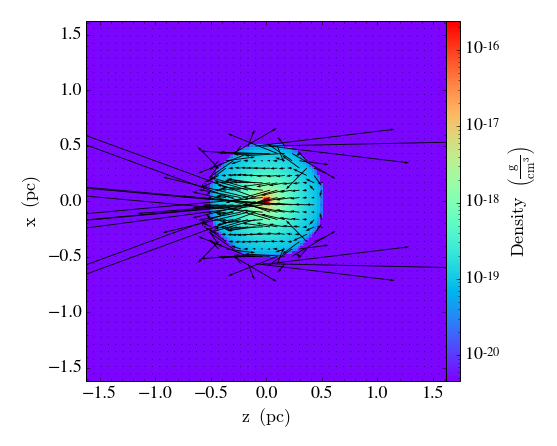


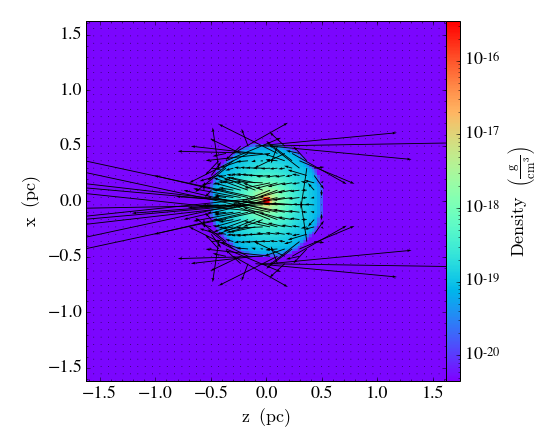


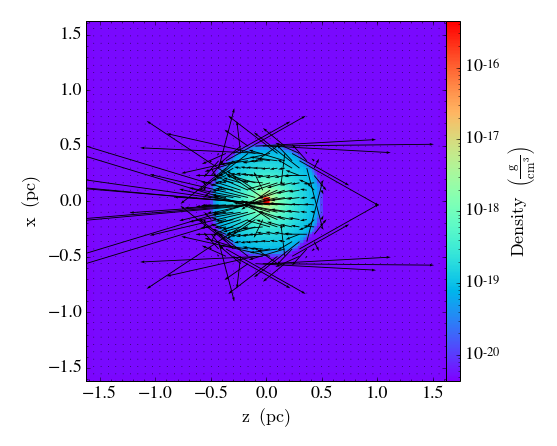


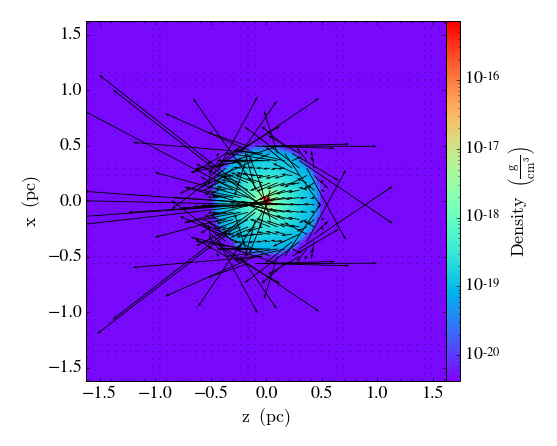


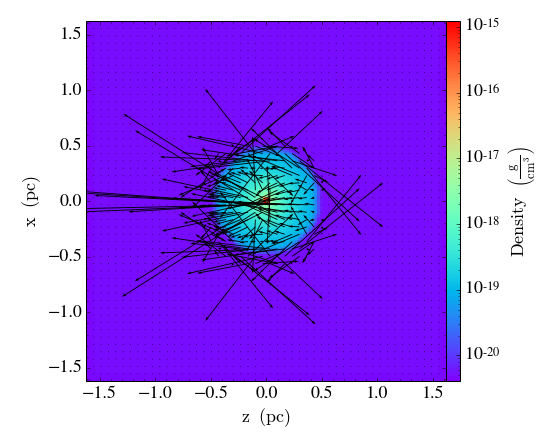


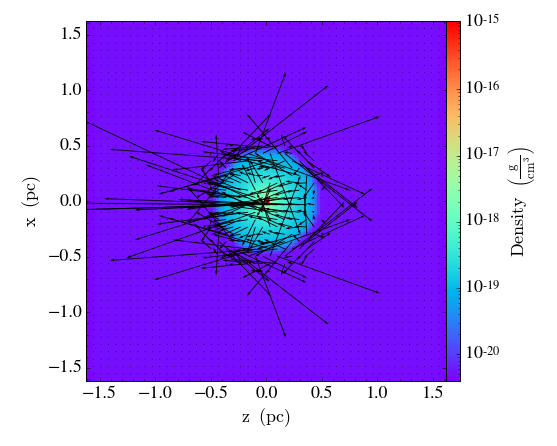


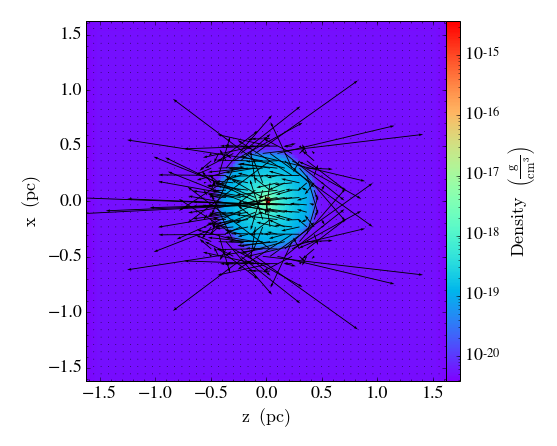


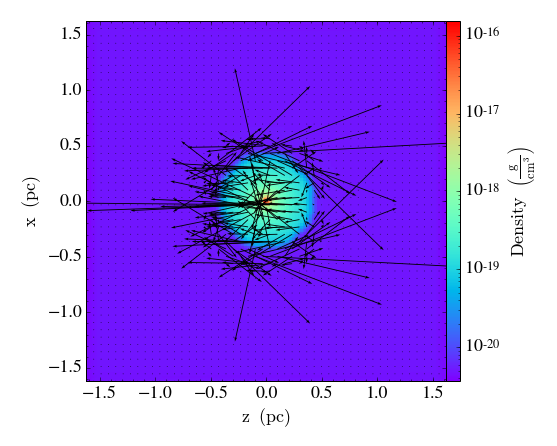


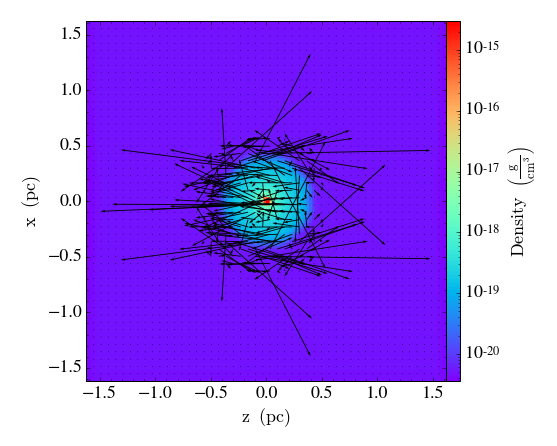


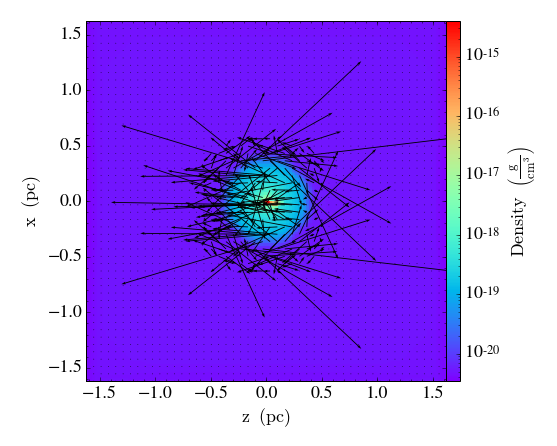


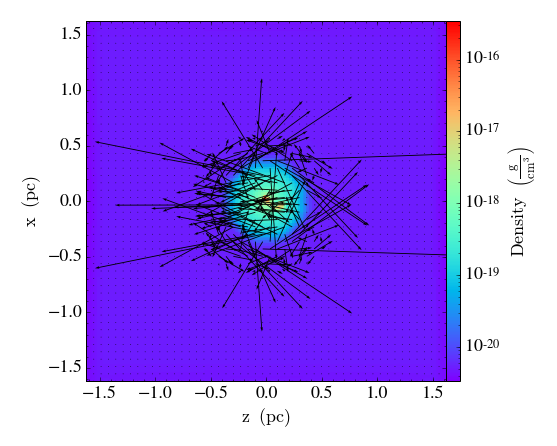

/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)



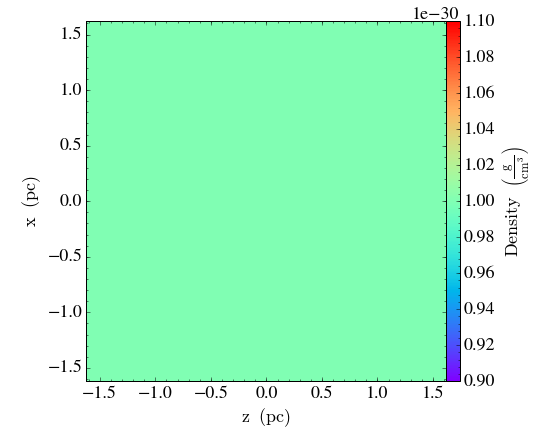


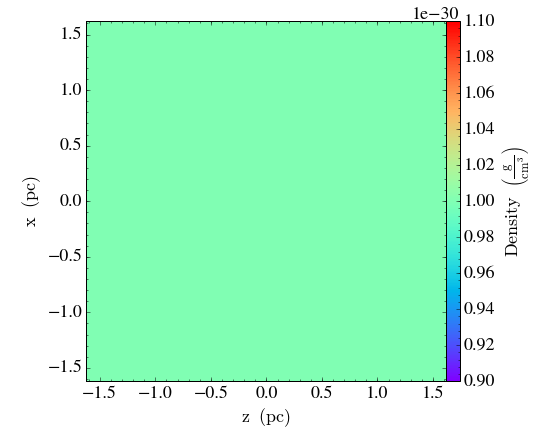


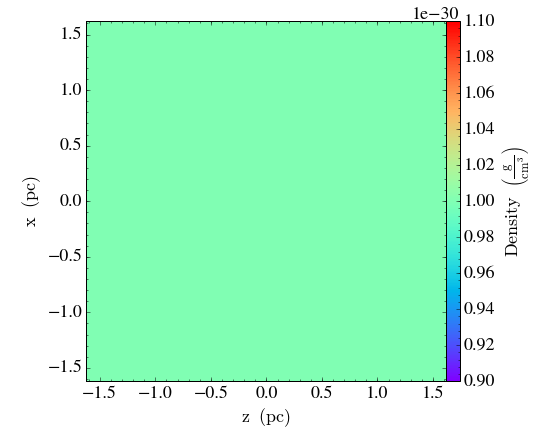


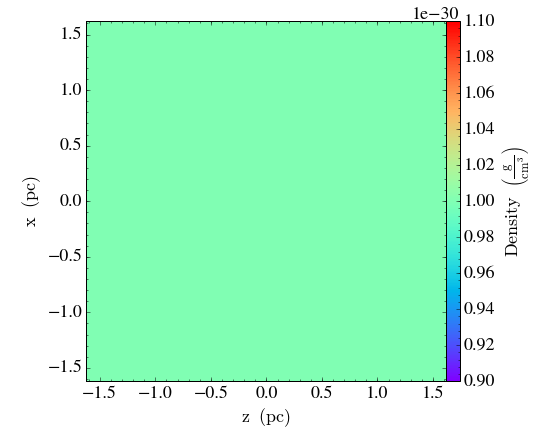


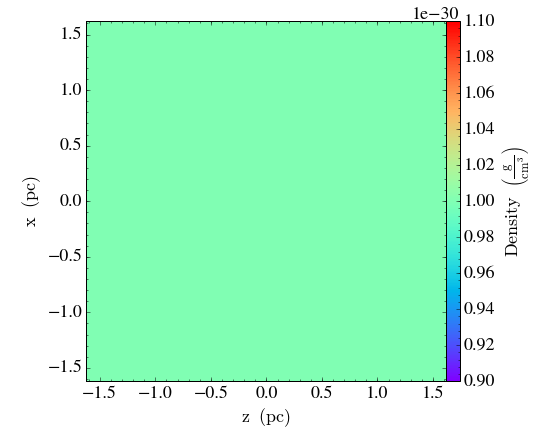


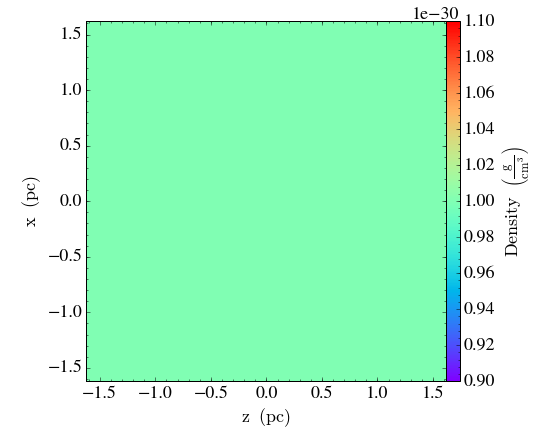


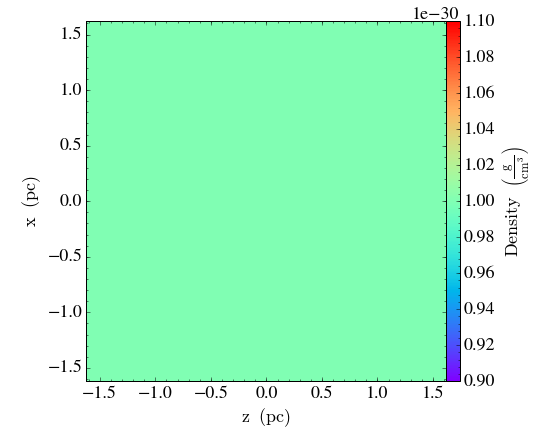


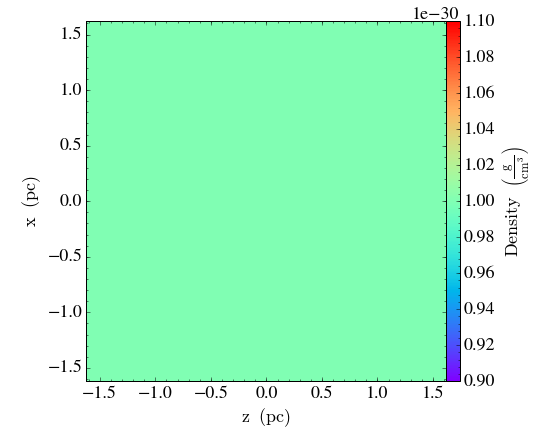


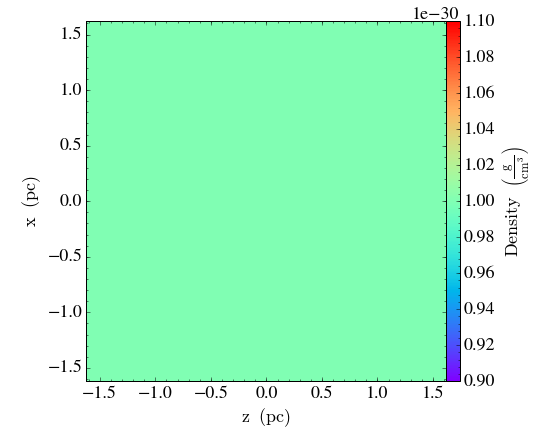


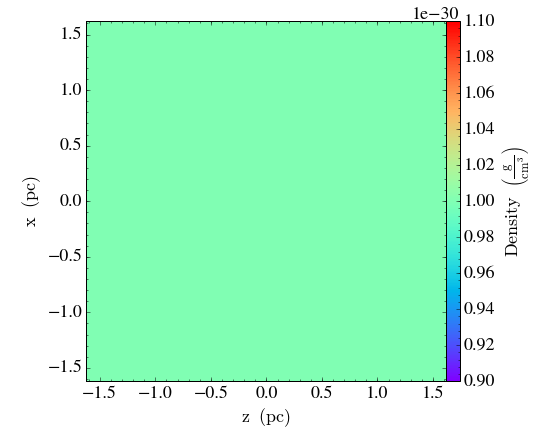


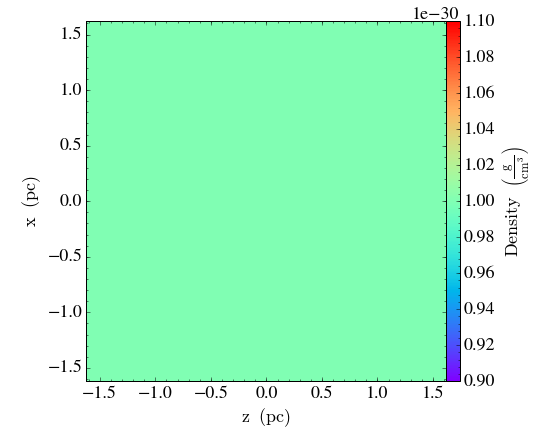


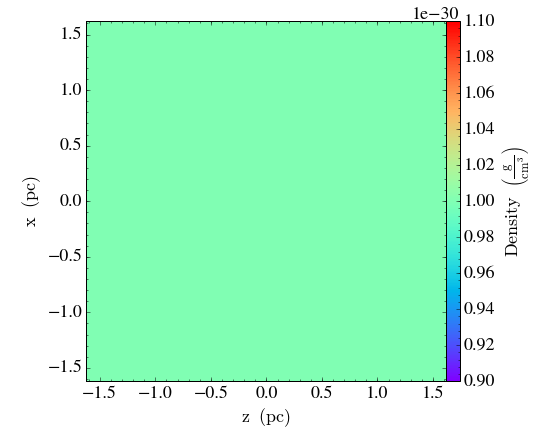


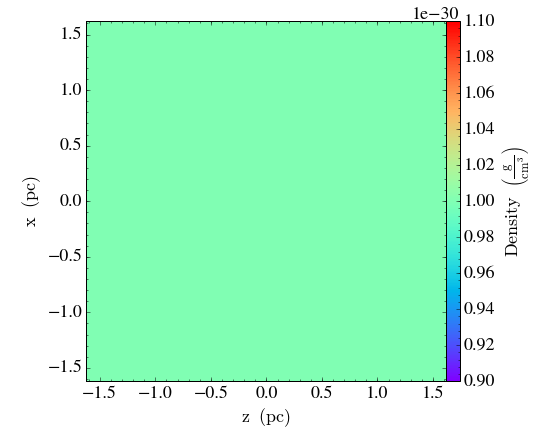

In [31]:
END_TIME = 565
for t in np.arange(END_TIME):
    if t%20 ==0:
        plot_dens(t,'y',magnetic=True)